In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df= pd.read_csv("standardscaler3.csv")
df.head()

,Feature1,Feature2,Feature3,Target
0,7,506815,78179.054805,147107.322662
1,4,293822,70538.588873,127684.231772
2,8,77218,44636.920014,87982.249559
3,5,588518,86421.631346,166046.587018
4,7,771044,55814.069145,101011.603738


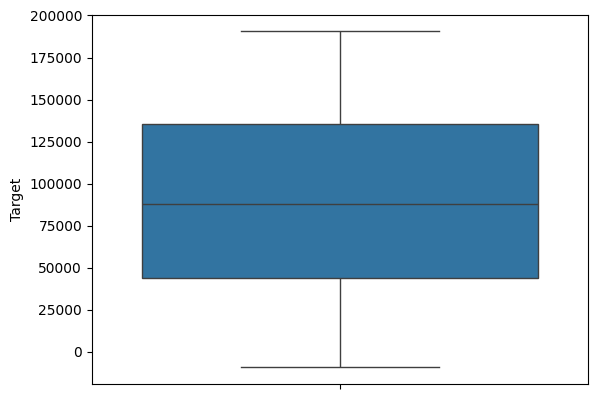

In [66]:
sns.boxplot(df["Target"])
plt.show()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  1000 non-null   int64  
 1   Feature2  1000 non-null   int64  
 2   Feature3  1000 non-null   float64
 3   Target    1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [41]:
x=df.drop(columns="Target", axis=1)
y=df["Target"]

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, train_size = 0.8,random_state=42)

In [43]:
ytest.mean()

np.float64(86872.11566855772)

In [44]:
model = LinearRegression()

In [45]:
model.fit(xtrain,ytrain)  # model training

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
y_predicted = model.predict(xtest)

In [47]:
ytrain_predicted = model.predict(xtrain)

In [48]:
model.coef_ #slope value

array([-1.90917070e+01,  2.55230384e-04,  1.79990677e+00])

In [49]:
model.intercept_  # base value

np.float64(663.3359224578599)

In [50]:
df.corr()

,Feature1,Feature2,Feature3,Target
Feature1,1.000000,-0.022619,-0.039036,-0.037666
Feature2,-0.022619,1.000000,-0.024157,-0.024257
Feature3,-0.039036,-0.024157,1.000000,0.995135
Target,-0.037666,-0.024257,0.995135,1.000000


In [51]:
targeted_mean=ytest.mean()
targeted_mean

np.float64(86872.11566855772)

In [52]:
predicted_test=model.predict(xtest)
# predicted_test

In [53]:
predicted_train=model.predict(xtrain)
# predicted_train

In [54]:
#r2score
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error

r2Score for the train

In [55]:
r2_score(ytrain,ytrain_predicted) # 99%

0.990280886960456

R2score for the Test

In [56]:
r2_score(ytest,y_predicted)  #99%

0.9902822563064014

> Underfit coz tarin_score = 99 and test_score = 99

STANDARDSCALAR

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

#standardizing the values

In [59]:
xtrain_scaled = scaler.fit_transform(xtrain)
xtrain_scaled

array([[ 0.04029928,  1.35016187, -1.2832588 ],
       [ 0.4287261 ,  1.27673624,  0.68899671],
       [ 1.20557975,  0.7159433 ,  1.38675154],
       ...,
       [-1.513408  ,  1.23046416, -0.17710939],
       [-1.12498118,  1.4513411 , -0.41686935],
       [-0.73655436, -0.71808777, -0.06822929]], shape=(800, 3))

In [60]:
xtest_scaled = scaler.transform(xtest)
xtest_scaled

array([[ 0.04029928,  1.20894202,  1.30817812],
       [ 1.59400657,  0.88435119,  0.91114696],
       [ 0.4287261 , -1.24831658,  0.53753872],
       [ 1.20557975,  0.90052814,  0.00295259],
       [-0.73655436, -0.75826634,  0.99043722],
       [-1.12498118,  1.20470035, -0.74078814],
       [-1.12498118, -0.29065208, -0.54749276],
       [ 1.59400657, -0.1559706 ,  0.57691668],
       [ 1.59400657, -1.55783743,  1.56383811],
       [ 0.4287261 , -1.78565622,  1.02825118],
       [-0.73655436, -1.68545292,  0.12557919],
       [ 1.20557975,  1.42494622, -0.69080137],
       [-1.513408  , -1.06572153,  0.16861156],
       [-1.513408  ,  0.63978299, -0.93518994],
       [-0.73655436,  0.62916159,  0.87745526],
       [ 0.04029928, -0.50244566, -0.75674424],
       [-1.513408  ,  0.80383197, -0.63243624],
       [ 0.04029928,  1.46721114,  0.43662534],
       [ 0.4287261 , -0.462474  , -1.61086096],
       [-1.12498118, -1.0698356 ,  0.67584916],
       [ 1.59400657, -1.23433978,  0.821

In [61]:
model = LinearRegression()

In [62]:
model.fit(xtrain_scaled,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
model.coef_ 

array([-4.91513611e+01,  7.40118263e+01,  5.19891719e+04])

slope values before standarscaler - array([-1.90917070e+01,  2.55230384e-04,  1.79990677e+00])          
slope values after using standardscaler array - ([-4.91513611e+01,  7.40118263e+01,  5.19891719e+04])


In [64]:
model.score(xtrain_scaled,ytrain)

0.990280886960456

In [65]:
model.score(xtest_scaled,ytest)

0.9902822563064014